In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_size = (64, 64)
batch_size = 100
train_ds = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/DataSet Brain/Training",validation_split=0.2,subset="training", color_mode="rgb", seed=1337,image_size=image_size,batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/DataSet Brain/Testing", validation_split=0.8, subset="validation", color_mode="rgb",  seed=1337, image_size=image_size, batch_size=batch_size)
train_ds = train_ds.prefetch(buffer_size=100)
val_ds = val_ds.prefetch(buffer_size=100)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 1311 files belonging to 4 classes.
Using 1048 files for validation.


In [ ]:
import os

train = "/content/drive/MyDrive/DataSet Brain/Training"

class_names_train = os.listdir(train)
print("Class names Train:", class_names_train)

test = "/content/drive/MyDrive/DataSet Brain/Testing"

class_names_test = os.listdir(test)
print("Class names Test:", class_names_test)

Class names Train: ['notumor', 'meningioma', 'pituitary', 'glioma']
Class names Test: ['pituitary', 'meningioma', 'glioma', 'notumor']


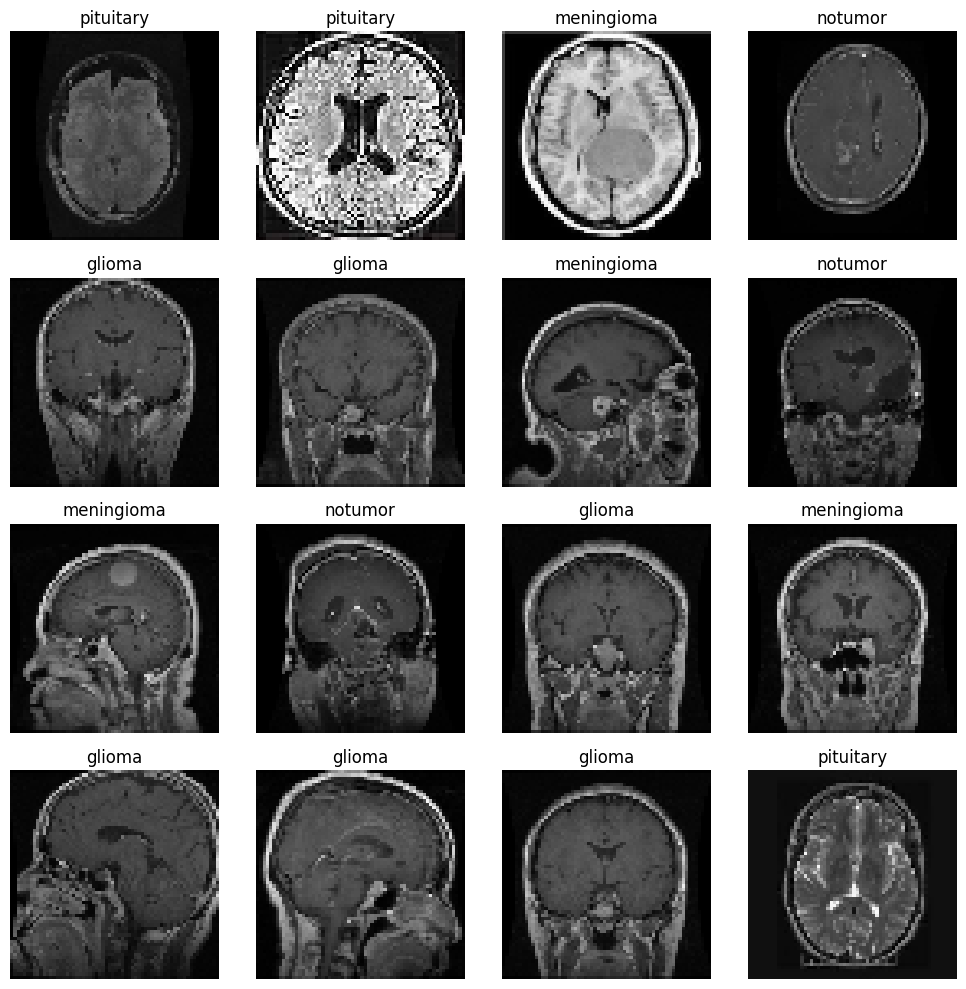

In [ ]:
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names_train[labels[i]])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

In [ ]:

# Define model
def make_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    x = keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Dropout(0.25)(x)
    x = keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Dropout(0.25)(x)
    x = keras.layers.Flatten()(x)
    x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
    x = keras.layers.Dense(512, activation='relu')(x)
    x = keras.layers.Dropout(0.5)(x)
    outputs = keras.layers.Dense(4, activation='softmax')(x)
    return keras.Model(inputs, outputs)

# Create model
image_size = (64, 64, 3)

model = make_model(input_shape=image_size)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8192)                │          32,768 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,322,884 (16.49 MB)

 Trainable params: 4,306,500 (16.43 MB)

 Non-trainable params: 16,384 (64.00 KB)

In [ ]:
history = model.fit(train_ds, epochs=40, validation_data=val_ds)


model.save('my_model.keras')

Epoch 1/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 24s 359ms/step - accuracy: 0.6139 - loss: 1.4944 - val_accuracy: 0.4323 - val_loss: 5.1094
Epoch 2/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 38s 411ms/step - accuracy: 0.7529 - loss: 0.8793 - val_accuracy: 0.7061 - val_loss: 1.0708
Epoch 3/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 368ms/step - accuracy: 0.8015 - loss: 0.6506 - val_accuracy: 0.7395 - val_loss: 1.0194
Epoch 4/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 385ms/step - accuracy: 0.8255 - loss: 0.5483 - val_accuracy: 0.7510 - val_loss: 0.8187
Epoch 5/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 429ms/step - accuracy: 0.8491 - loss: 0.4455 - val_accuracy: 0.7872 - val_loss: 0.6101
Epoch 6/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 19s 423ms/step - accuracy: 0.8756 - loss: 0.3600 - val_accuracy: 0.7185 - val_loss: 0.9791
Epoch 7/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 18s 366ms/step - accuracy: 0.8856 - loss: 0.3204 - val_accuracy: 0.7176 - val_loss: 0.8964
Epoch 8/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 380ms/step - accuracy: 0.8935 - loss: 0.2992 - val_accu

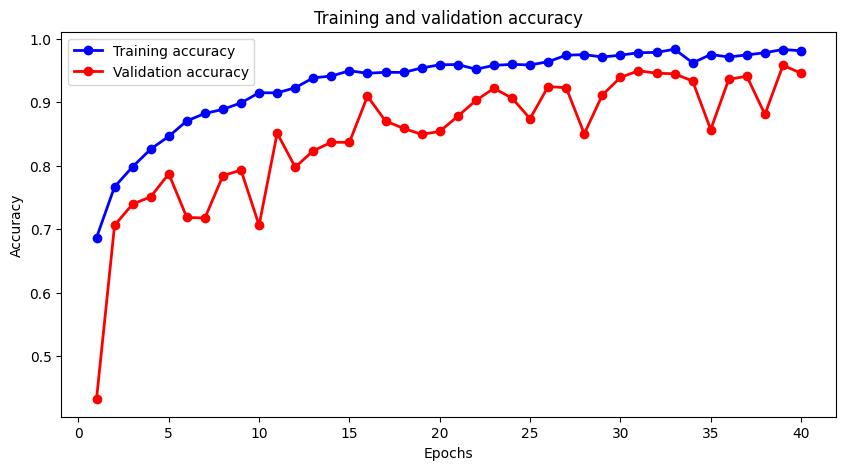

In [ ]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']


def plot_training_history(history):
    epochs = range(1, len(train_acc) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_acc, 'bo-', label='Training accuracy', linewidth=2, markersize=6)
    plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy', linewidth=2, markersize=6)
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_training_history(history)



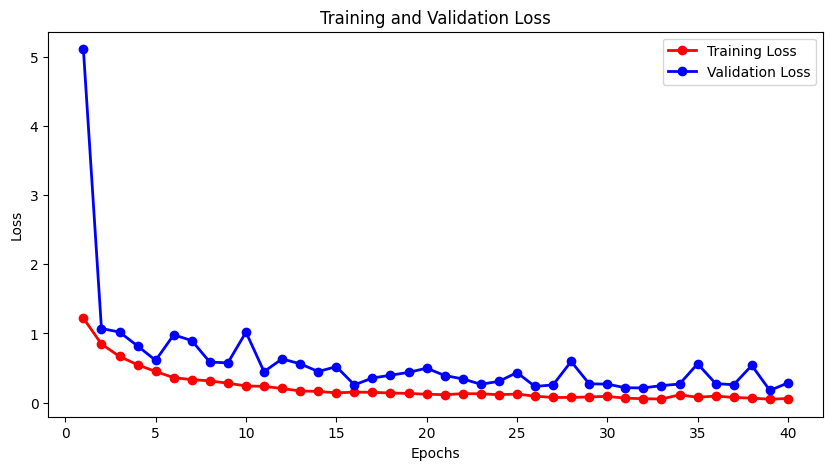

In [ ]:
def plot_training_Loss(history):
    epochs = range(1, len(train_acc) + 1)
    plt.figure(figsize=(10, 5))
    plt.plot(epochs , train_loss , 'ro-' , label = 'Training Loss', linewidth=2, markersize=6)
    plt.plot(epochs , val_loss , 'bo-' , label = 'Validation Loss',linewidth=2, markersize=6)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plot_training_Loss(history)

In [ ]:
train_acc = history.history['accuracy'][-1]
train_loss = history.history['loss'][-1]
val_acc = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]
print(f"Training Accuracy  : {train_acc}")
print(f"Training Loss      : {train_loss}")
print(f"Testing Accuracy   : {val_acc}")
print(f"Testing Loss       : {val_loss}")



Training Accuracy  : 0.9809628129005432
Training Loss      : 0.05871704965829849
Testing Accuracy   : 0.9456107020378113
Testing Loss       : 0.2841041386127472


Validation loss on a single batch: 0.24689938127994537
Validation accuracy on a single batch: 0.949999988079071
Validation loss on a single batch: 0.1487700343132019
Validation accuracy on a single batch: 0.9599999785423279
Validation loss on a single batch: 0.2135753184556961
Validation accuracy on a single batch: 0.9399999976158142
Validation loss on a single batch: 0.20750993490219116
Validation accuracy on a single batch: 0.9599999785423279
Validation loss on a single batch: 0.5559017062187195
Validation accuracy on a single batch: 0.9399999976158142
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━

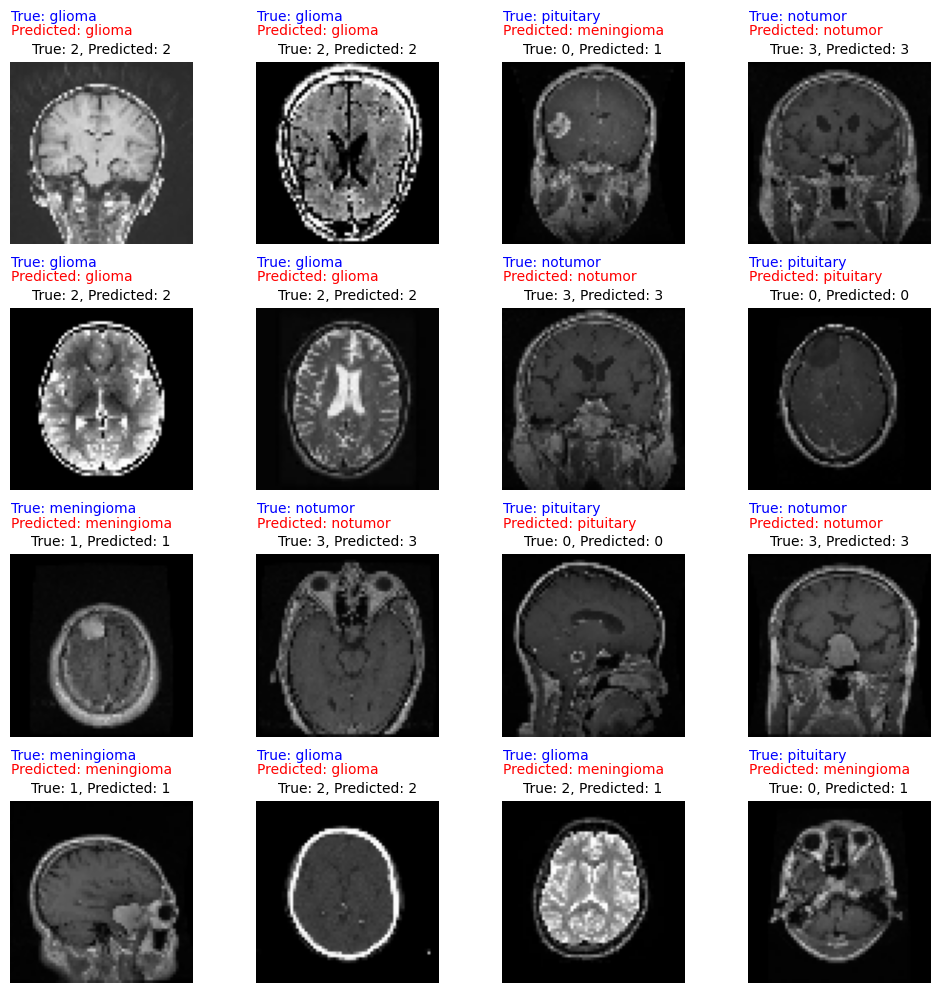

Test Names:  ['pituitary', 'meningioma', 'glioma', 'notumor']


In [ ]:
for images, labels in val_ds.take(5):
    loss, accuracy = model.evaluate(images, labels, verbose=0)
    print(f'Validation loss on a single batch: {loss}')

    print(f'Validation accuracy on a single batch: {accuracy}')
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):  # Take one batch from the dataset
    for i in range(16):
        img = images[i]
        true_label = labels[i].numpy()
        img = tf.expand_dims(img, axis=0)

        prediction = model.predict(img)
        predicted_label = tf.argmax(prediction[0]).numpy()

        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(img[0].numpy().astype("uint8"))
        plt.title(f"True: {true_label}, Predicted: {predicted_label}" ,fontsize=10)
        plt.text(0, -15, f"True: {class_names_test[true_label]}", fontsize=10, color='blue')
        plt.text(0, -10, f"Predicted: {class_names_test[predicted_label]}", fontsize=10, color='red')
        plt.axis("off")

plt.tight_layout()
plt.show()
print("Test Names: ",class_names_test)

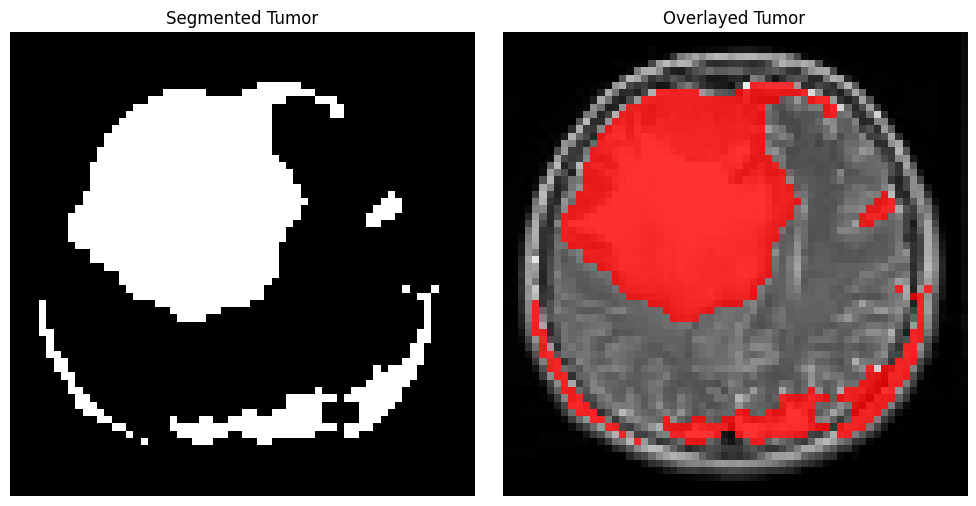

In [ ]:
import cv2
import numpy as np

def segment_tumor(image):

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply thresholding
    _, thresholded = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY)

    # Use a structuring element
    structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

    # Apply morphological operations
    morphed = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, structuring_element)

    # Overlay the segmented region on the original image
    overlayed = image.copy()
    overlayed[morphed == 255] = [255, 0, 0]  # Highlight tumor in red
    # Define the opacity level (alpha)
    alpha = 0.8  # 0 is fully transparent, 1 is fully opaque

    # Blend the original image and the overlay
    blended = cv2.addWeighted(overlayed, alpha, image, 1 - alpha, 0)


    return morphed, blended



# Load a sample image for testing
for images, labels in val_ds.take(1):
    sample_image = images[0].numpy().astype("uint8")
    segmented, overlayed = segment_tumor(sample_image)

    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Segmented Tumor")
    plt.imshow(segmented, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Overlayed Tumor")
    plt.imshow(overlayed)
    plt.axis("off")

    plt.tight_layout()
    plt.show()


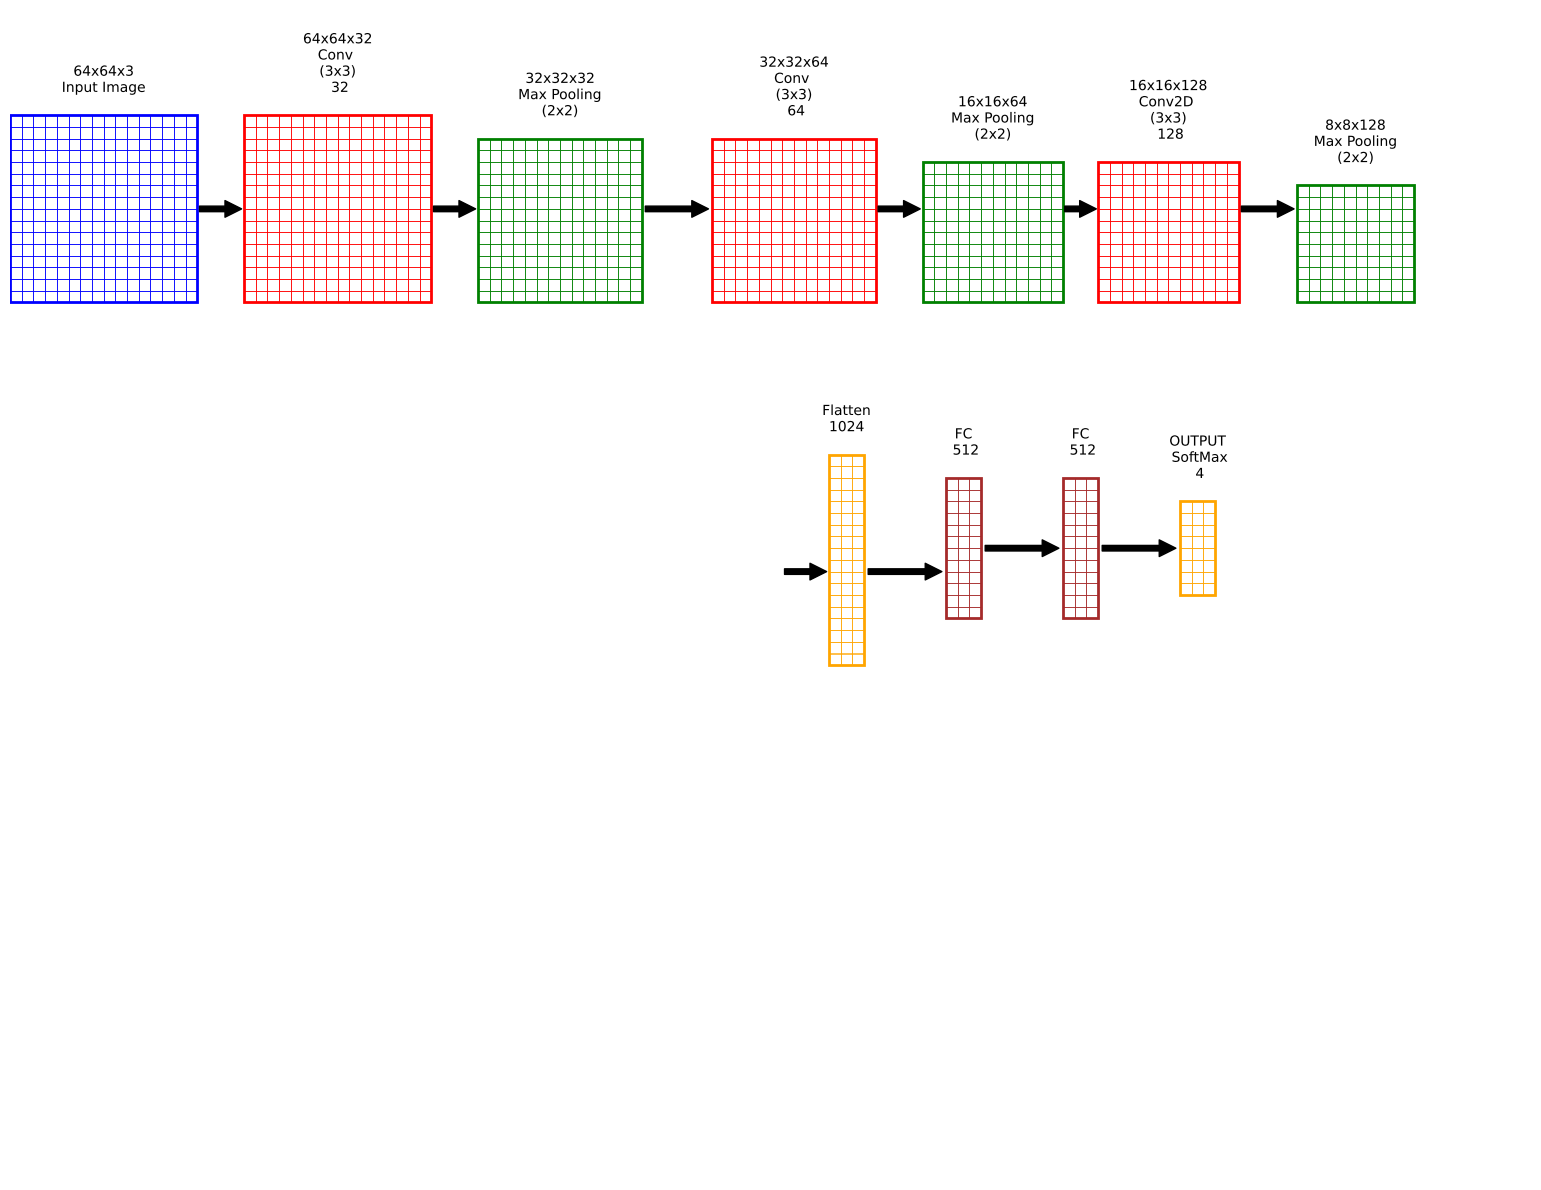

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patheffects import withStroke

# Define a function to add a rectangular box
def add_rect(ax, xy, width, height, edgecolor='black', facecolor='none', label=None, fontsize=10):
    rect = patches.Rectangle(xy, width, height, linewidth=2, edgecolor=edgecolor, facecolor=facecolor)
    ax.add_patch(rect)
    if label:
        ax.text(xy[0] + width / 2, xy[1] + height + 2, label, fontsize=fontsize, ha='center', path_effects=[withStroke(linewidth=1, foreground='white')])
    # Add grid lines to the rectangle
    for i in range(int(width)):
        for j in range(int(height)):
            ax.add_patch(patches.Rectangle((xy[0]+i, xy[1]+j), 1, 1, linewidth=0.5, edgecolor=edgecolor, facecolor='none'))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 12))

# Set the limits and aspect ratio
ax.set_xlim(0, 130)
ax.set_ylim(0, 100)
ax.set_aspect('equal')

# Draw the input image
add_rect(ax, (0, 75), 16, 16, edgecolor='blue', label='64x64x3\nInput Image')

# Draw the first Conv layer
add_rect(ax, (20, 75), 16, 16, edgecolor='red', label='64x64x32\nConv \n(3x3)\n 32')

# Draw the first Max Pooling layer
add_rect(ax, (40, 75), 14, 14, edgecolor='green', label='32x32x32\nMax Pooling\n(2x2)')

# Draw the second Conv layer
add_rect(ax, (60, 75), 14, 14, edgecolor='red', label='32x32x64\nConv \n(3x3)\n 64')

# Draw the second Max Pooling layer
add_rect(ax, (78, 75), 12, 12, edgecolor='green', label='16x16x64\nMax Pooling\n(2x2)')

# Draw the third Conv layer
add_rect(ax, (93, 75), 12, 12, edgecolor='red', label='16x16x128\nConv2D \n(3x3)\n 128')

# Draw the third Max Pooling layer
add_rect(ax, (110, 75), 10, 10, edgecolor='green', label='8x8x128\nMax Pooling\n(2x2)')

# Draw Flatten
add_rect(ax, (70, 44), 3, 18, edgecolor='orange', label='Flatten\n1024')

# Draw Dense layers
add_rect(ax, (80, 48), 3, 12, edgecolor='brown', label='FC\n 512')
add_rect(ax, (90, 48), 3, 12, edgecolor='brown', label='FC\n 512')
add_rect(ax, (100, 50), 3, 8, edgecolor='orange', label='OUTPUT\n SoftMax\n 4')

# Draw arrows
def draw_arrow(ax, start, end):
    ax.annotate('', xy=end, xytext=start,
                arrowprops=dict(facecolor='black', shrink=0.05))

draw_arrow(ax, (16, 83), (20, 83))
draw_arrow(ax, (36, 83), (40, 83))
draw_arrow(ax, (54, 83), (60, 83))
draw_arrow(ax, (74, 83), (78, 83))
draw_arrow(ax, (90, 83), (93, 83))
draw_arrow(ax, (105, 83), (110, 83))
draw_arrow(ax, (66, 52), (70, 52))
draw_arrow(ax, (73, 52), (80, 52))
draw_arrow(ax, (83, 54), (90, 54))
draw_arrow(ax, (93, 54), (100, 54))

# Adjust the plot
ax.axis('off')
plt.tight_layout()
plt.show()








